# 웹에 들어갈 실시간 데이터프레임 생성
-> data/for_web 이고 전처리는 rpm > 1000 -> rpm / 10만 해줌 

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [23]:
df = pd.read_csv("../data/data2.csv")
df.head(2)

,time,E_scr_pv,E_scr_sv,c_temp_pv,c_temp_sv,k_rpm_pv,k_rpm_sv,n_temp_pv,n_temp_sv,scale_pv,s_temp_pv,s_temp_sv
0,2023-05-18T15:09:19.018900Z,8,8,69.6,70,189,180,67.2,70,3.01,67.1,70
1,2023-05-18T15:09:20.128150Z,8,8,69.8,70,189,180,67.2,70,3.01,67.0,70


"time", "scale_pv" 날리기

In [24]:
RT_df = df.drop(["time"], axis=1)
RT_df

,E_scr_pv,E_scr_sv,c_temp_pv,c_temp_sv,k_rpm_pv,k_rpm_sv,n_temp_pv,n_temp_sv,scale_pv,s_temp_pv,s_temp_sv
0,8,8,69.6,70,189,180,67.2,70,3.01,67.1,70
1,8,8,69.8,70,189,180,67.2,70,3.01,67.0,70
2,8,8,69.7,70,189,180,67.9,70,3.08,65.9,70
3,8,8,69.7,70,189,180,67.8,70,3.08,65.9,70
4,8,8,69.7,70,189,180,67.8,70,3.08,65.9,70
...,...,...,...,...,...,...,...,...,...,...,...
235408,8,8,69.8,70,191,1910,67.5,70,0.00,67.0,70
235409,8,8,69.7,70,191,1910,67.4,70,0.00,66.8,70
235410,8,8,69.7,70,191,1910,67.3,70,0.00,66.7,70
235411,8,8,69.8,70,191,1910,67.2,70,0.00,66.6,70


In [25]:
RT_df.info() # 결측치 없음 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235413 entries, 0 to 235412
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   E_scr_pv   235413 non-null  int64  
 1   E_scr_sv   235413 non-null  int64  
 2   c_temp_pv  235413 non-null  float64
 3   c_temp_sv  235413 non-null  int64  
 4   k_rpm_pv   235413 non-null  int64  
 5   k_rpm_sv   235413 non-null  int64  
 6   n_temp_pv  235413 non-null  float64
 7   n_temp_sv  235413 non-null  int64  
 8   scale_pv   235413 non-null  float64
 9   s_temp_pv  235413 non-null  float64
 10  s_temp_sv  235413 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 19.8 MB


In [26]:
RT_df.describe() # k_rpm_sv이상함

,E_scr_pv,E_scr_sv,c_temp_pv,c_temp_sv,k_rpm_pv,k_rpm_sv,n_temp_pv,n_temp_sv,scale_pv,s_temp_pv,s_temp_sv
count,235413.000000,235413.000000,235413.000000,235413.0,235413.000000,235413.000000,235413.000000,235413.000000,235413.000000,235413.000000,235413.0
mean,7.891026,7.998581,70.211779,70.0,178.204662,609.621346,67.841010,69.985727,5.257169,67.637708,70.0
std,0.924159,0.074126,0.524797,0.0,22.461606,735.412105,1.119829,0.999448,55.582926,1.276029,0.0
min,0.000000,7.000000,65.100000,70.0,0.000000,130.000000,57.700000,0.000000,0.000000,65.400000,70.0
25%,8.000000,8.000000,69.800000,70.0,176.000000,180.000000,67.000000,70.000000,0.000000,66.600000,70.0
50%,8.000000,8.000000,70.200000,70.0,181.000000,180.000000,67.400000,70.000000,0.000000,67.500000,70.0
75%,8.000000,8.000000,70.500000,70.0,187.000000,1730.000000,68.600000,70.000000,0.000000,68.400000,70.0
max,12.000000,12.000000,72.800000,70.0,203.000000,2030.000000,71.200000,70.000000,655.350000,72.400000,70.0


In [27]:
RT_df['k_rpm_sv'] = RT_df['k_rpm_sv'].apply(lambda x: x / 10 if x > 1000 else x)
RT_df.describe()

,E_scr_pv,E_scr_sv,c_temp_pv,c_temp_sv,k_rpm_pv,k_rpm_sv,n_temp_pv,n_temp_sv,scale_pv,s_temp_pv,s_temp_sv
count,235413.000000,235413.000000,235413.000000,235413.0,235413.000000,235413.000000,235413.000000,235413.000000,235413.000000,235413.000000,235413.0
mean,7.891026,7.998581,70.211779,70.0,178.204662,177.684847,67.841010,69.985727,5.257169,67.637708,70.0
std,0.924159,0.074126,0.524797,0.0,22.461606,11.294162,1.119829,0.999448,55.582926,1.276029,0.0
min,0.000000,7.000000,65.100000,70.0,0.000000,130.000000,57.700000,0.000000,0.000000,65.400000,70.0
25%,8.000000,8.000000,69.800000,70.0,176.000000,180.000000,67.000000,70.000000,0.000000,66.600000,70.0
50%,8.000000,8.000000,70.200000,70.0,181.000000,180.000000,67.400000,70.000000,0.000000,67.500000,70.0
75%,8.000000,8.000000,70.500000,70.0,187.000000,180.000000,68.600000,70.000000,0.000000,68.400000,70.0
max,12.000000,12.000000,72.800000,70.0,203.000000,400.000000,71.200000,70.000000,655.350000,72.400000,70.0


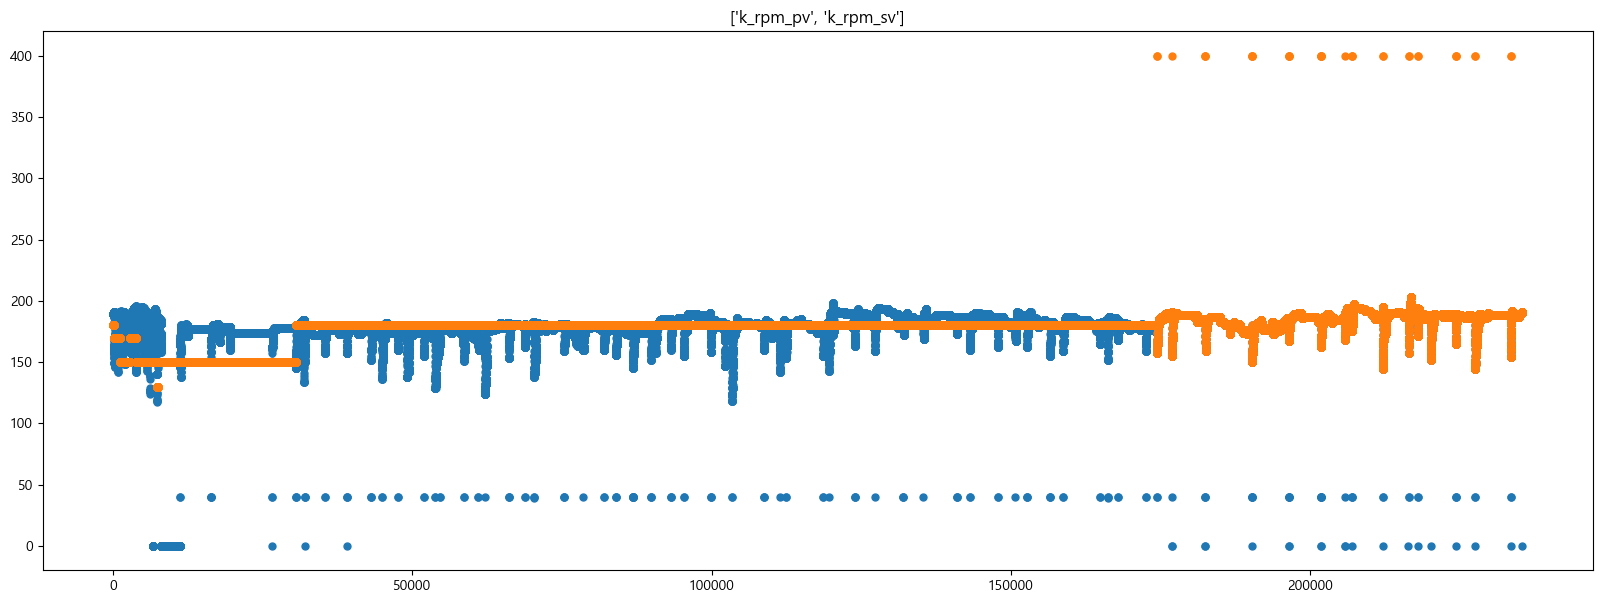

In [28]:
# 그래프로 분포 관찰 
def draw_point(df, *cols):
    if len(cols) == 0:
        for col_name in df.columns[1:]:
            plt.figure(figsize=(20, 7))
            plt.plot(df[col_name],'.', markersize=10) 
            plt.title(col_name)
            plt.show()
    else:
        for col_name in cols:
            plt.figure(figsize=(20, 7))
            plt.plot(df[col_name],'.', markersize=10) 
            plt.title(col_name)
            plt.show()
            
# plt.plot(df["E_scr_pv"])
draw_point(RT_df, ["k_rpm_pv", "k_rpm_sv"])

In [29]:
RT_df.to_csv('../data/for_web.csv', index=False)

In [30]:
web_df = pd.read_csv("../data/for_web.csv")
web_df

,E_scr_pv,E_scr_sv,c_temp_pv,c_temp_sv,k_rpm_pv,k_rpm_sv,n_temp_pv,n_temp_sv,scale_pv,s_temp_pv,s_temp_sv
0,8,8,69.6,70,189,180.0,67.2,70,3.01,67.1,70
1,8,8,69.8,70,189,180.0,67.2,70,3.01,67.0,70
2,8,8,69.7,70,189,180.0,67.9,70,3.08,65.9,70
3,8,8,69.7,70,189,180.0,67.8,70,3.08,65.9,70
4,8,8,69.7,70,189,180.0,67.8,70,3.08,65.9,70
...,...,...,...,...,...,...,...,...,...,...,...
235408,8,8,69.8,70,191,191.0,67.5,70,0.00,67.0,70
235409,8,8,69.7,70,191,191.0,67.4,70,0.00,66.8,70
235410,8,8,69.7,70,191,191.0,67.3,70,0.00,66.7,70
235411,8,8,69.8,70,191,191.0,67.2,70,0.00,66.6,70
